<a href="https://colab.research.google.com/github/bridgetmanu/QDA_LDA_KNN/blob/main/Mini_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from scipy.stats import multivariate_normal

# Set random seed for reproducibility
np.random.seed(1)

In [4]:
# Data preprocessing

# load the data
forest = pd.read_csv('/content/drive/MyDrive/forestfires.csv')
before = forest.head()

# log transformation
copy = forest.copy()
copy['area'] = copy['area'].replace(0, 1)
copy['area'] = np.log(copy['area'])

after = copy.head()
print(before)


   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0


a. Exploratory Data analysis

       DMC     DC   ISI  temp  RH  wind  rain      area
148  108.3  647.1  17.0  17.4  43   6.7   0.0  0.067659
149   80.9  685.2  17.9  23.7  25   4.5   0.0  0.113329
150   56.4  433.3   7.1  23.2  39   5.4   0.0  0.173953
151   68.6  355.2   7.2  24.8  29   2.2   0.0  0.307485
152   51.2  424.1   6.2  24.6  43   1.8   0.0  0.357674


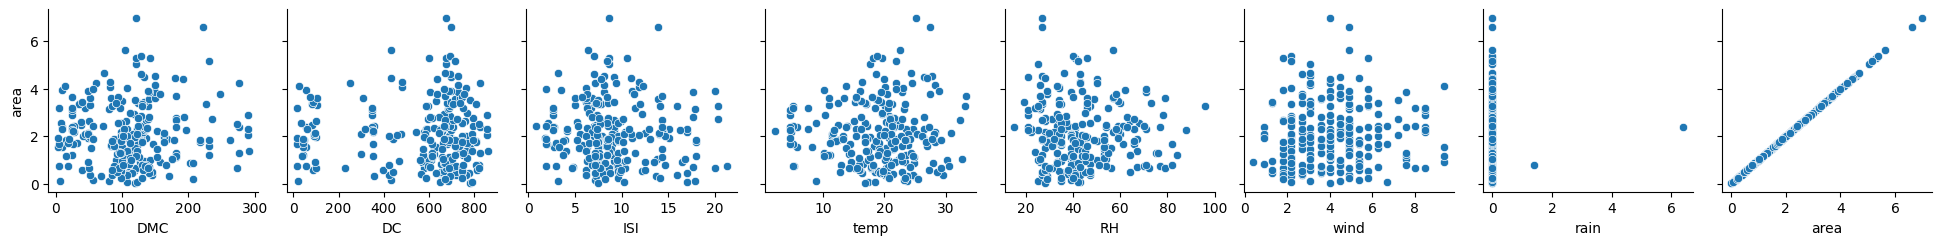

DMC     0.040161
DC     -0.011872
ISI    -0.052972
temp    0.022695
RH     -0.053579
wind    0.051616
rain   -0.001165
area    1.000000
Name: area, dtype: float64


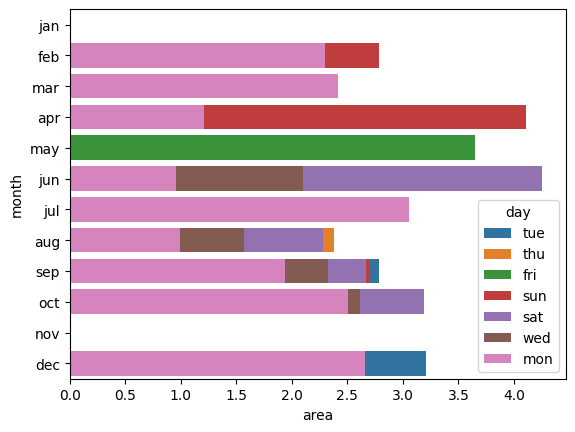

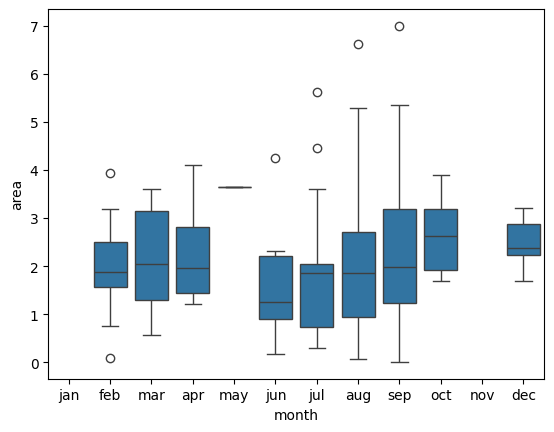

In [26]:
# create a subset with just the continuous variables
copy_subset = copy.iloc[:, -8:]
copy_subset = copy_subset[copy_subset['area'] > 0]
print(copy_subset.head())

# create scatterplots for all quantitative data
q = sns.PairGrid(copy_subset, y_vars=['area'])
q.map(sns.scatterplot)
plt.show()

# correlation of copy_subset with area
corr = copy_subset.corr()
area_corr = corr['area']
print(area_corr)

# create a subset with just the categorical variables
copy_subset2 = copy[['month','day','area']]
copy_subset2 = copy_subset2[copy_subset2['area'] > 0]
copy_subset2.head()

# create barplots for all qualitative data
ord = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
w = sns.barplot(x='area', y='month', data=copy_subset2, errorbar=None,
            hue='day', dodge=False, order=ord, orient="h")
plt.show()

sns.boxplot(x='month', y='area', data=copy_subset2, order=ord)
plt.show()





In [ ]:
# 15a: fit a simple linear regression model to predict the response

#15b: it a multiple regression model to predict the response usingall of the predictors

In [30]:
dtrain = pd.read_csv('/content/drive/MyDrive/diabetes_train.csv')
print(dtrain.head())

dtrain.info()

dtest = pd.read_csv('/content/drive/MyDrive/diabetes_test.csv')
dtest.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               700 non-null    int64  
 1   Glucose                   700 non-null    int64  
 2   BloodPressure             700 non-null    int64  
 3   SkinThickness             700 non-null    int64  
 4   Insulin                   700 non-null    int64  
 5   BMI                       700 non-null    float64
 6   DiabetesPedigreeFunction  700 non-null    float64
 7   Age                       700 non-null    int64  
 8   Outcome                   700 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 49.3 KB


In [ ]:
admin = pd.read_csv('/content/drive/MyDrive/admission.csv')
admin.head()

In [ ]:
# KNN

In [ ]:
# LDA

In [ ]:
# QDA